### Nama Kelompok: Aditya Setiawan, Dwikie Setiawan, Agnes S, Dian P.
### DTS A
### Analisa dan Visualisasi Data 
### Analisa Kebakaran Hutan 
### File From Forest Fires Data Set [Cortez and Morais, 2007], UCI Machine Learning Repository

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm

In [178]:
dataset = pd.read_csv('forestfires.csv')
dataset.month.replace(('jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'),(1,2,3,4,5,6,7,8,9,10,11,12), inplace=True)
dataset.day.replace(('mon','tue','wed','thu','fri','sat','sun'),(1,2,3,4,5,6,7), inplace=True)
dataset.head(20)

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,3,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,10,2,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,10,6,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,3,5,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,3,7,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0
5,8,6,8,7,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,0.0
6,8,6,8,1,92.3,88.9,495.6,8.5,24.1,27,3.1,0.0,0.0
7,8,6,8,1,91.5,145.4,608.2,10.7,8.0,86,2.2,0.0,0.0
8,8,6,9,2,91.0,129.5,692.6,7.0,13.1,63,5.4,0.0,0.0
9,7,5,9,6,92.5,88.0,698.6,7.1,22.8,40,4.0,0.0,0.0


In [18]:
dataset.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


In [44]:
# Collecting X and Y
X = dataset['temp'].values
Y = dataset['RH'].values
z = sm.add_constant(X)
result = sm.OLS(Y,X).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.712
Model:                            OLS   Adj. R-squared (uncentered):              0.711
Method:                 Least Squares   F-statistic:                              1274.
Date:                Mon, 19 Aug 2019   Prob (F-statistic):                   1.84e-141
Time:                        17:58:08   Log-Likelihood:                         -2404.7
No. Observations:                 517   AIC:                                      4811.
Df Residuals:                     516   BIC:                                      4816.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             2.0148      0.056     35.689      0.000       1.904       2.126
==============================================================================
Omnibus:                       32.218   Durbin-Watson:                   1.500
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               36.566
Skew:                           0.640   Prob(JB):                     1.15e-08
Kurtosis:                       3.244   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

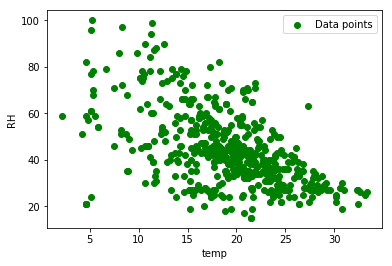

In [48]:
# Plot the Input Data
plt.scatter(X, Y, c='green', label='Data points')
plt.xlabel('temp')
plt.ylabel('RH')
plt.legend()
plt.show()

In [50]:
# Calculating coefficient (menghitung secaramanual untuk memperoleh b0 dan b1)
#menghitung nilai rata-rata x dan rata-rata y

# Mean X and Y
mean_x = np.mean(X)
mean_y = np.mean(Y)

# Total number of values (menghitung jumlah data)
n = len(X)

# Using the formula to calculate theta1 and theta2 (mencari nilai b0 dan b1)
numer = 0 #pembilang
denom = 0 #penyebut
for i in range(n):
    numer += (X[i] - mean_x) * (Y[i] - mean_y)
    denom += (X[i] - mean_x) ** 2
b1 = numer / denom
b0 = mean_y - (b1 * mean_x)

# Printing coefficients
print("coefficients for regression",b1, b0)

coefficients for regression -1.4820442356415562 72.28278412380027


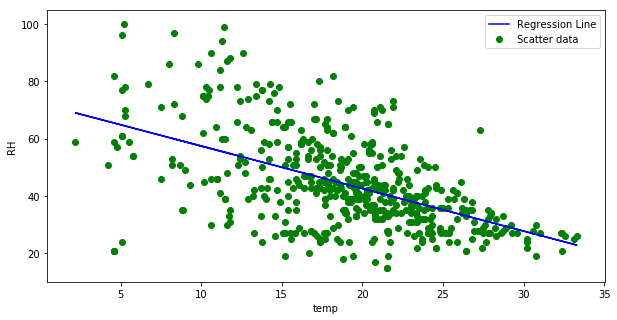

In [52]:
# Plotting Values and Regression Line
%matplotlib inline

plt.rcParams['figure.figsize'] = (10.0, 5.0)
# max_x = np.max(X) + 100
# min_x = np.min(X) - 100

y = b0 + b1 * X

# Ploting Line
plt.plot(X, y, color='blue', label='Regression Line')
# Ploting Scatter Points
plt.scatter(X, Y, c='green', label='Scatter data')

plt.xlabel('temp')
plt.ylabel('RH')
plt.legend()
plt.show()

In [54]:
x_values = list(dataset['X'])
y_values = list(dataset['Y'])

loc_values = []

for index in range(0, len(x_values)):
    temp_value = []

    temp_value.append(x_values[index])
    temp_value.append(y_values[index])
    loc_values.append(temp_value)

In [56]:
month_values = list(dataset['month'])
day_values = list(dataset['day'])

ffmc_values = list(dataset['FFMC'])
dmc_values = list(dataset['DMC'])
dc_values = list(dataset['DC'])
isi_values = list(dataset['ISI'])

temp_values = list(dataset['temp'])
rh_values = list(dataset['RH'])
wind_values = list(dataset['wind'])
rain_values = list(dataset['rain'])

area_values = list(dataset['area'])

In [57]:
attribute_list = []

for index in range(0, len(x_values)):
    temp_list = []
    
    temp_list.append(x_values[index])
    temp_list.append(y_values[index])
    
    temp_list.append(month_values[index])
    temp_list.append(day_values[index])

    temp_list.append(ffmc_values[index])
    temp_list.append(dmc_values[index])
    temp_list.append(dc_values[index])
    temp_list.append(isi_values[index])

    temp_list.append(temp_values[index])
    temp_list.append(rh_values[index])
    temp_list.append(wind_values[index])
    temp_list.append(rain_values[index])
    
    attribute_list.append(temp_list)

In [58]:
def count_points(x_points, y_points, scaling_factor):
    count_array = []
    
    for index in range(0, len(x_points)):
        temp_value = [x_points[index], y_points[index]]
        count = 0
        
        for value in loc_values:
            if(temp_value == value):
                count = count + 1
        count_array.append(count * scaling_factor )

    return count_array

In [86]:
def histogram_plot(dataset, title):
    plt.figure(figsize=(8, 6))    
    
    ax = plt.subplot()    
    ax.spines["top"].set_visible(False)    
    ax.spines["bottom"].set_visible(False)    
    ax.spines["right"].set_visible(False)    
    ax.spines["left"].set_visible(False)
    
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left() 
    
    plt.title(title, fontsize = 22)
    plt.hist(dataset, color ='#c62c6e', edgecolor='black', linewidth=1.2)

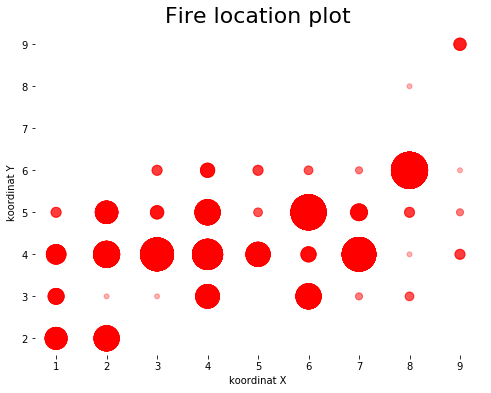

In [67]:
plt.figure(figsize=(8, 6))    
    
ax = plt.subplot()    
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False)
    
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left() 
    
plt.title("Fire location plot", fontsize = 22)
plt.scatter(x_values, y_values, s = count_points(x_values, y_values, 25), alpha = 0.3, c='red')
plt.xlabel('koordinat X')
plt.ylabel('koordinat Y')
plt.show()

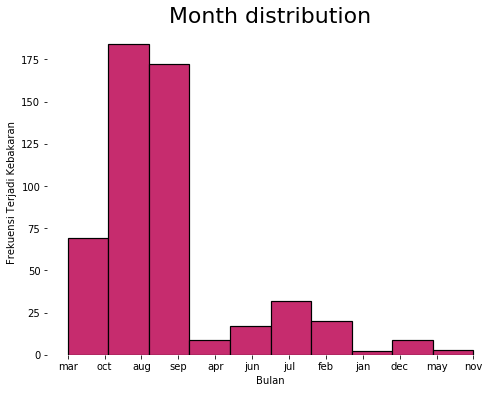

In [87]:
histogram_plot(month_values, title = "Month distribution")
plt.xlabel('Bulan')
plt.ylabel('Frekuensi Terjadi Kebakaran')
plt.show()

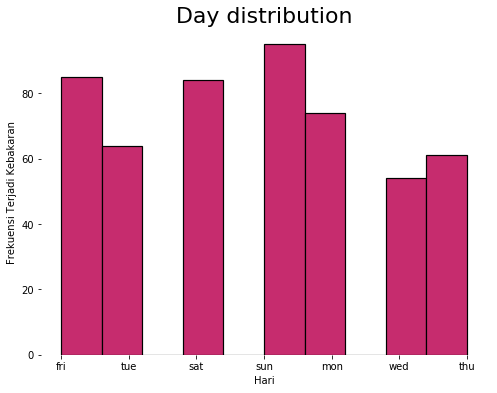

In [89]:
histogram_plot(day_values, title = "Day distribution")
plt.xlabel('Hari')
plt.ylabel('Frekuensi Terjadi Kebakaran')
plt.show()

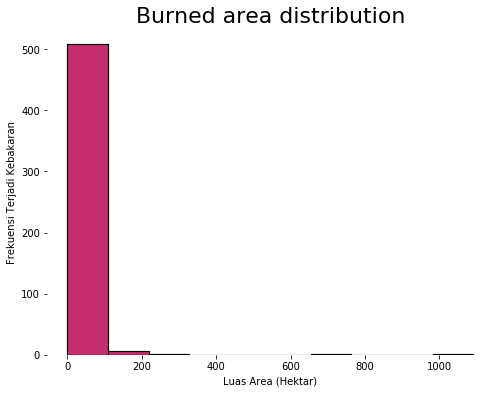

In [91]:
histogram_plot(area_values, title = "Burned area distribution")
plt.xlabel('Luas Area (Hektar)')
plt.ylabel('Frekuensi Terjadi Kebakaran')
plt.show()

In [200]:
D = dataset.iloc[:, [8, 2,]].values

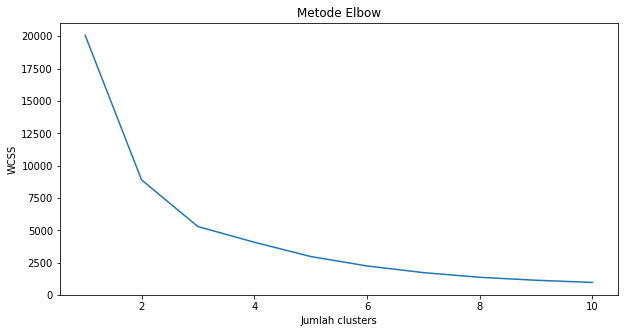

In [201]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(D)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Metode Elbow')
plt.xlabel('Jumlah clusters')
plt.ylabel('WCSS')
plt.show()

In [202]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(D)

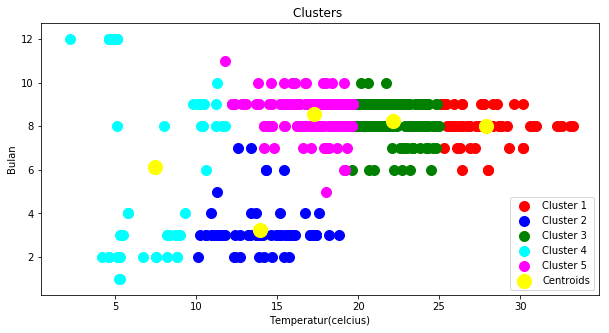

In [203]:
plt.scatter(D[y_kmeans == 0, 0], D[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(D[y_kmeans == 1, 0], D[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(D[y_kmeans == 2, 0], D[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(D[y_kmeans == 3, 0], D[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(D[y_kmeans == 4, 0], D[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 200, c = 'yellow', label = 'Centroids')
plt.title('Clusters ')
plt.xlabel('Temperatur(celcius)')
plt.ylabel('Bulan')
plt.legend()
plt.show()